In [1]:
#Import all the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import cv2
import glob
import time
import tensorflow as tf
from tensorflow import keras
from collections import Counter
from nltk.corpus import stopwords
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from gtts import gTTS
from IPython.display import Audio 
import nltk
nltk.download('stopwords')
from PIL import Image

from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import Input, layers
from tensorflow.keras.layers import Dropout
from nltk.translate.bleu_score import sentence_bleu

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from nltk.translate.meteor_score import meteor_score

In [3]:
print(tf.__version__)
print(keras.__version__)

2.6.0
2.6.0


In [4]:
!python -V

Python 3.8.8


In [5]:
import re
import glob
import shutil
import os

In [35]:
# for cat in search_category:
#     print(cat)

car accidents
domestic violence
fights
injured people
people dead and bleeding
fire accidents
women being raped
terrorist


In [6]:
files = os.listdir('./VQA-Experimentation/train2014/train2014')
print(len(files))

82782


In [7]:
import json
with open('./VQA-Experimentation/annotations_trainval2014/annotations/captions_train2014.json', 'r') as f:
    annotations = json.load(f)

In [8]:
# read image and captions
img_path_MSCOCO = 'VQA-Experimentation/train2014/train2014/'
img_path_AD = 'AD-images/images/'
text_path_AD = 'AD-captions.txt'

In [9]:
content_MSCOCO = []
for val in annotations['annotations']:
  caption = f"{val['caption']}"
  image_path = img_path_MSCOCO + 'COCO_train2014_' + '%012d.jpg' % (val['image_id'])
  content_MSCOCO.append([image_path,caption])

In [10]:
content_MSCOCO[:10]

[['VQA-Experimentation/train2014/train2014/COCO_train2014_000000318556.jpg',
  'A very clean and well decorated empty bathroom'],
 ['VQA-Experimentation/train2014/train2014/COCO_train2014_000000116100.jpg',
  'A panoramic view of a kitchen and all of its appliances.'],
 ['VQA-Experimentation/train2014/train2014/COCO_train2014_000000318556.jpg',
  'A blue and white bathroom with butterfly themed wall tiles.'],
 ['VQA-Experimentation/train2014/train2014/COCO_train2014_000000116100.jpg',
  'A panoramic photo of a kitchen and dining room'],
 ['VQA-Experimentation/train2014/train2014/COCO_train2014_000000379340.jpg',
  'A graffiti-ed stop sign across the street from a red car '],
 ['VQA-Experimentation/train2014/train2014/COCO_train2014_000000379340.jpg',
  'A vandalized stop sign and a red beetle on the road'],
 ['VQA-Experimentation/train2014/train2014/COCO_train2014_000000318556.jpg',
  'A bathroom with a border of butterflies and blue paint on the walls above it.'],
 ['VQA-Experimentati

In [170]:
len(content_MSCOCO)

414104

In [171]:
# Read all the images present in the img_path 
imgs = glob.glob(img_path_AD + '/*.jpg',recursive=True)
print('Total images present in AD Dataset= {}'.format(len(imgs)))

Total images present in AD Dataset= 474


In [172]:
print('Total images = {}'.format(len(files)+len(imgs)))

Total images = 83731


In [173]:
imgs[0]

'AD-images/images\\03YmDBLZJPtVxxZnduKn.jpg'

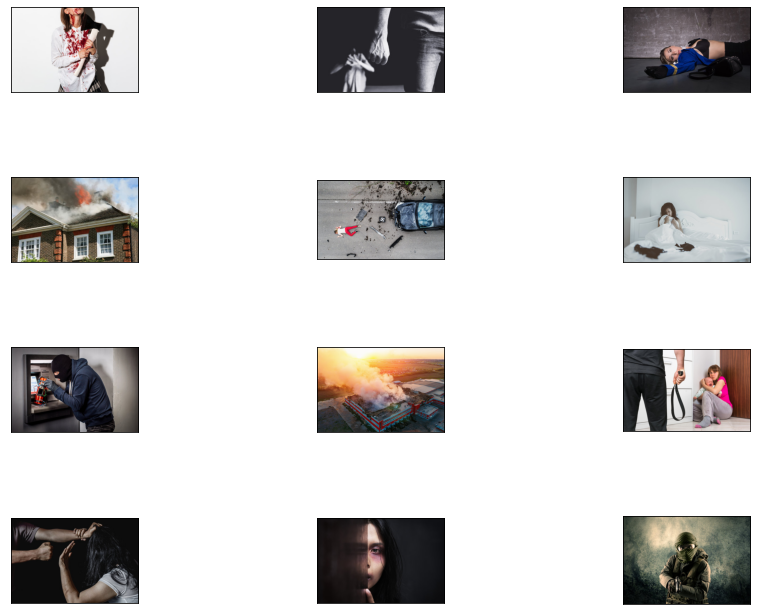

In [174]:
# Visualise the images present in the dataset
num_rows = 4
num_cols =3
num_imgs = num_rows * num_cols
plt.figure(figsize=(16,12))

for i in range(num_imgs):
    plt.subplot(num_rows,2*num_cols, 2*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(mpimg.imread(imgs[i]))

In [175]:
# Visualise the text present in the text_path
file = open(text_path_AD,encoding='utf8')
txt = file.read()
file.close()
print(txt[:400])

Onld9fxMrRqPRPsHSupl.jpg,Car accident taking place on the road . 
Onld9fxMrRqPRPsHSupl.jpg,a car crashed beside another car on the road .
Onld9fxMrRqPRPsHSupl.jpg,Two cars are broken from the front after colliding .
Onld9fxMrRqPRPsHSupl.jpg,There is one grey and one blue car involved in the car accident .
Onld9fxMrRqPRPsHSupl.jpg,Broken pieces of the two cars on the road after the car accident .



In [176]:
# create a list of captions and path
def load_text(path):
    file =open(path)
    text = list(filter(None, (line.rstrip() for line in file)))
    file.close()
    
    lst_line = []
    for line in text:
        lst_line.append(line.split(',',maxsplit=1))
    return lst_line    

content_AD = load_text(text_path_AD)

In [178]:
content_AD[0]

['Onld9fxMrRqPRPsHSupl.jpg', 'Car accident taking place on the road .']

In [179]:
aug_Path = 'Augmentation/'
aug_img_path = []

In [180]:
aug_content = []

In [181]:
for lst in content_AD:
    folder = lst[0].split('.')[0]
    
    imgs = os.listdir('Augmentation/'+folder)
    
    for img in imgs:
        
        aug_content.append([img,lst[1]])
        
        aug_img_path.append('Augmentation/'+folder+'/'+img)
        
    

In [182]:
aug_img_path[:5]

['Augmentation/Onld9fxMrRqPRPsHSupl/car accidents_0_1281.jpg',
 'Augmentation/Onld9fxMrRqPRPsHSupl/car accidents_0_1336.jpg',
 'Augmentation/Onld9fxMrRqPRPsHSupl/car accidents_0_1411.jpg',
 'Augmentation/Onld9fxMrRqPRPsHSupl/car accidents_0_1747.jpg',
 'Augmentation/Onld9fxMrRqPRPsHSupl/car accidents_0_2126.jpg']

In [183]:
aug_content[:5]

[['car accidents_0_1281.jpg', 'Car accident taking place on the road .'],
 ['car accidents_0_1336.jpg', 'Car accident taking place on the road .'],
 ['car accidents_0_1411.jpg', 'Car accident taking place on the road .'],
 ['car accidents_0_1747.jpg', 'Car accident taking place on the road .'],
 ['car accidents_0_2126.jpg', 'Car accident taking place on the road .']]

In [184]:
all_img_id = [i[0] for i in aug_content[0:]]     # to store all the image id 
all_img_path = aug_img_path
all_captions = [i[1] for i in aug_content[0:]]  #store all the captions 

df_AD_aug = pd.DataFrame(list(zip(all_img_id,all_img_path,all_captions)),columns = ['ID','Path','Captions'])
df_AD_aug.head(5)

,ID,Path,Captions
0,car accidents_0_1281.jpg,Augmentation/Onld9fxMrRqPRPsHSupl/car accident...,Car accident taking place on the road .
1,car accidents_0_1336.jpg,Augmentation/Onld9fxMrRqPRPsHSupl/car accident...,Car accident taking place on the road .
2,car accidents_0_1411.jpg,Augmentation/Onld9fxMrRqPRPsHSupl/car accident...,Car accident taking place on the road .
3,car accidents_0_1747.jpg,Augmentation/Onld9fxMrRqPRPsHSupl/car accident...,Car accident taking place on the road .
4,car accidents_0_2126.jpg,Augmentation/Onld9fxMrRqPRPsHSupl/car accident...,Car accident taking place on the road .


In [185]:
# create df
all_img_id = [i[0] for i in content_AD[0:]]     # to store all the image id 
all_img_path = [img_path_AD+i[0] for i in content_AD[0:]] #store all the image path 
all_captions = [i[1] for i in content_AD[0:]]  #store all the captions 

df_AD = pd.DataFrame(list(zip(all_img_id,all_img_path,all_captions)),columns = ['ID','Path','Captions'])
df_AD.head(6)

,ID,Path,Captions
0,Onld9fxMrRqPRPsHSupl.jpg,AD-images/images/Onld9fxMrRqPRPsHSupl.jpg,Car accident taking place on the road .
1,Onld9fxMrRqPRPsHSupl.jpg,AD-images/images/Onld9fxMrRqPRPsHSupl.jpg,a car crashed beside another car on the road .
2,Onld9fxMrRqPRPsHSupl.jpg,AD-images/images/Onld9fxMrRqPRPsHSupl.jpg,Two cars are broken from the front after colli...
3,Onld9fxMrRqPRPsHSupl.jpg,AD-images/images/Onld9fxMrRqPRPsHSupl.jpg,There is one grey and one blue car involved in...
4,Onld9fxMrRqPRPsHSupl.jpg,AD-images/images/Onld9fxMrRqPRPsHSupl.jpg,Broken pieces of the two cars on the road afte...
5,ROkPFy0EUiAjbypLEKVS.jpg,AD-images/images/ROkPFy0EUiAjbypLEKVS.jpg,One woman beside a damaged car making a call f...


In [186]:
len(content_MSCOCO)

414104

In [187]:
# create df
all_img_id = [i[0][40:] for i in content_MSCOCO[0:]]     # to store all the image id 
all_img_path = [i[0] for i in content_MSCOCO[0:]] #store all the image path 
all_captions = [i[1] for i in content_MSCOCO[0:]]  #store all the captions 

df_MSCOCO = pd.DataFrame(list(zip(all_img_id,all_img_path,all_captions)),columns = ['ID','Path','Captions'])
df_MSCOCO.head(6)

,ID,Path,Captions
0,COCO_train2014_000000318556.jpg,VQA-Experimentation/train2014/train2014/COCO_t...,A very clean and well decorated empty bathroom
1,COCO_train2014_000000116100.jpg,VQA-Experimentation/train2014/train2014/COCO_t...,A panoramic view of a kitchen and all of its a...
2,COCO_train2014_000000318556.jpg,VQA-Experimentation/train2014/train2014/COCO_t...,A blue and white bathroom with butterfly theme...
3,COCO_train2014_000000116100.jpg,VQA-Experimentation/train2014/train2014/COCO_t...,A panoramic photo of a kitchen and dining room
4,COCO_train2014_000000379340.jpg,VQA-Experimentation/train2014/train2014/COCO_t...,A graffiti-ed stop sign across the street from...
5,COCO_train2014_000000379340.jpg,VQA-Experimentation/train2014/train2014/COCO_t...,A vandalized stop sign and a red beetle on the...


In [189]:
print('Total Datapoints Collected = {}'.format(len(df_MSCOCO)+len(df_AD)+len(df_AD_aug)))

Total Datapoints Collected = 454429


In [190]:
#combine both the dataframes
df = df_MSCOCO.append(df_AD)
df = df.append(df_AD_aug)
df_AD.shape, df_MSCOCO.shape, df.shape , df_AD_aug.shape

((1010, 3), (414104, 3), (454429, 3), (39315, 3))

In [191]:
df.reset_index(drop=True,inplace=True)

In [192]:
df

,ID,Path,Captions
0,COCO_train2014_000000318556.jpg,VQA-Experimentation/train2014/train2014/COCO_t...,A very clean and well decorated empty bathroom
1,COCO_train2014_000000116100.jpg,VQA-Experimentation/train2014/train2014/COCO_t...,A panoramic view of a kitchen and all of its a...
2,COCO_train2014_000000318556.jpg,VQA-Experimentation/train2014/train2014/COCO_t...,A blue and white bathroom with butterfly theme...
3,COCO_train2014_000000116100.jpg,VQA-Experimentation/train2014/train2014/COCO_t...,A panoramic photo of a kitchen and dining room
4,COCO_train2014_000000379340.jpg,VQA-Experimentation/train2014/train2014/COCO_t...,A graffiti-ed stop sign across the street from...
...,...,...,...
454424,injured people_0_948.jpg,Augmentation/j9lqI0nx4G7jm4si2wgD/injured peop...,doctor applying first aid on the injured hand ...
454425,injured people_0_9510.jpg,Augmentation/j9lqI0nx4G7jm4si2wgD/injured peop...,doctor applying first aid on the injured hand ...
454426,injured people_0_9646.jpg,Augmentation/j9lqI0nx4G7jm4si2wgD/injured peop...,doctor applying first aid on the injured hand ...
454427,injured people_0_9799.jpg,Augmentation/j9lqI0nx4G7jm4si2wgD/injured peop...,doctor applying first aid on the injured hand ...


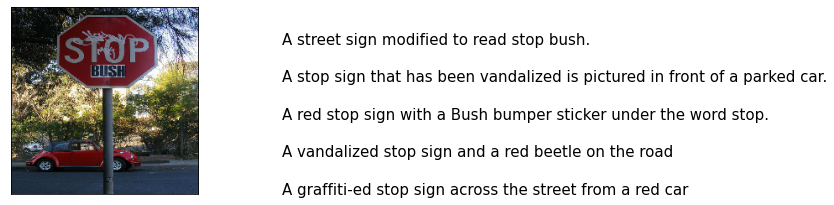

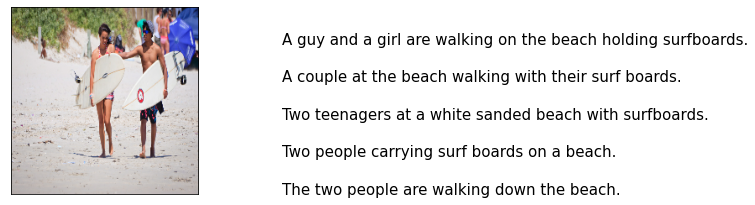

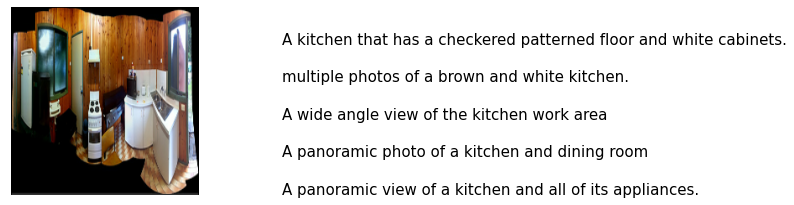

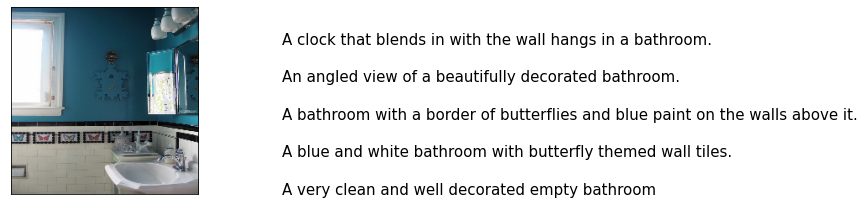

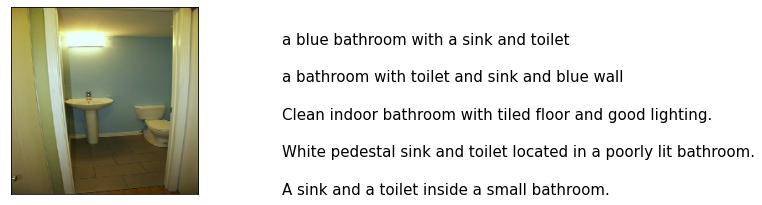

In [193]:
# Visualize some the images along with their captions
img_path=list(set(df.Path[:10]))   # each image has 5 captions. 20/5 = 4 images
count = 1
j=0
for path in img_path:
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, [224, 224])
      
    fig = plt.figure(figsize=(10,20))
    ax = fig.add_subplot(5,2,count,xticks=[],yticks=[])
    ax.imshow(img)
    

    count += 1
      
    ax = fig.add_subplot(5,2,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,5)
    
    img_cap=df.loc[df['Path'] == path, 'Captions']
    
    for i in range(len(img_cap)):
        ax.text(0,i,img_cap.iloc[i],fontsize=15)
    count += 1
    j+=1
plt.show()

In [194]:
def clean_text(sentence):
    sentence = sentence.lower()
    sentence = re.sub("[^a-z]+"," ",sentence)  # used reg expression to substitute anything that is not an alphabet
    sentence = sentence.split()
    
    sentence  = [s for s in sentence if len(s)>1]
    sentence = " ".join(sentence)
    return sentence
    

In [196]:
len(df)

454429

In [197]:
# Clean all Captions
for i in range(len(df)):
    df['Captions'][i] = clean_text(df['Captions'][i])     

In [198]:
# df.to_csv('MS-AD-AUG-Captions.csv')

In [199]:
df = pd.read_csv('MS-AD-AUG-Captions.csv')

In [200]:
df.columns

Index(['Unnamed: 0', 'ID', 'Path', 'Captions'], dtype='object')

In [201]:
del df['Unnamed: 0']
df

,ID,Path,Captions
0,COCO_train2014_000000318556.jpg,VQA-Experimentation/train2014/train2014/COCO_t...,very clean and well decorated empty bathroom
1,COCO_train2014_000000116100.jpg,VQA-Experimentation/train2014/train2014/COCO_t...,panoramic view of kitchen and all of its appli...
2,COCO_train2014_000000318556.jpg,VQA-Experimentation/train2014/train2014/COCO_t...,blue and white bathroom with butterfly themed ...
3,COCO_train2014_000000116100.jpg,VQA-Experimentation/train2014/train2014/COCO_t...,panoramic photo of kitchen and dining room
4,COCO_train2014_000000379340.jpg,VQA-Experimentation/train2014/train2014/COCO_t...,graffiti ed stop sign across the street from r...
...,...,...,...
454424,injured people_0_948.jpg,Augmentation/j9lqI0nx4G7jm4si2wgD/injured peop...,doctor applying first aid on the injured hand ...
454425,injured people_0_9510.jpg,Augmentation/j9lqI0nx4G7jm4si2wgD/injured peop...,doctor applying first aid on the injured hand ...
454426,injured people_0_9646.jpg,Augmentation/j9lqI0nx4G7jm4si2wgD/injured peop...,doctor applying first aid on the injured hand ...
454427,injured people_0_9799.jpg,Augmentation/j9lqI0nx4G7jm4si2wgD/injured peop...,doctor applying first aid on the injured hand ...


In [202]:
#Create the vocabulary & the counter for the captions

voc=[]
for sent in df['Captions']:
    for word in sent.split():
        voc.append(word)
        
voc_count = Counter(voc)
len(voc_count)

22901

Text(0.5, 1.0, 'Top 30 occuring words')

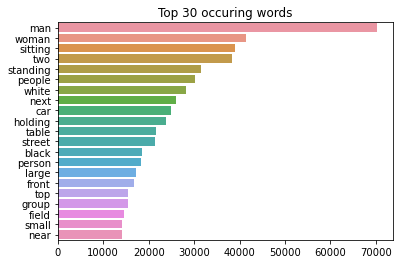

In [203]:
#Visualise the top 30 occuring words in the captions

sort_lst = voc_count.most_common(40)
stop=set(stopwords.words('english'))
x, y=[], []
for word,count in sort_lst:
    if (word not in stop):
        x.append(word)
        y.append(count)
            
sns.barplot(x=y,y=x).set_title('Top 30 occuring words')

In [204]:
#Create a list which contains all the captions
# add <start> and <end> tokens
annotations = ['<start> '+ i + ' <end>' for i in df.Captions]
print('Captions after adding start and end tokens',annotations[:8])

#Create a list which contains all the path to the images
all_img_path = [i for i in df.Path]
      
print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_path)))

Captions after adding start and end tokens ['<start> very clean and well decorated empty bathroom <end>', '<start> panoramic view of kitchen and all of its appliances <end>', '<start> blue and white bathroom with butterfly themed wall tiles <end>', '<start> panoramic photo of kitchen and dining room <end>', '<start> graffiti ed stop sign across the street from red car <end>', '<start> vandalized stop sign and red beetle on the road <end>', '<start> bathroom with border of butterflies and blue paint on the walls above it <end>', '<start> an angled view of beautifully decorated bathroom <end>']
Total captions present in the dataset: 454429
Total images present in the dataset: 454429


In [35]:
# import pickle 
# with open("DictionaryMSCOCO.pkl","wb") as f:
#     pickle.dump(annotations,f)

In [209]:
# create the tokenizer

top_k = 22901
tokenizer = keras.preprocessing.text.Tokenizer(num_words=top_k,oov_token="<unk>",filters='!"#$%&()*+.-/:;=?@[\]^_`{|}~ ')
tokenizer.fit_on_texts(annotations)


# Create word-to-index and index-to-word mappings.
word_index = tokenizer.word_index   
index_word = tokenizer.index_word

train_seqs = tokenizer.texts_to_sequences(annotations)

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

print('Caption: \n', annotations[1])
print('The train sequence is: \n', train_seqs[1])

Caption: 
 <start> panoramic view of kitchen and all of its appliances <end>
The train sequence is: 
 [2, 4331, 185, 6, 70, 9, 332, 6, 170, 688, 3]


In [210]:
index_word[1]

'<unk>'

In [211]:
print(annotations[:5])
print(train_seqs[:5])

['<start> very clean and well decorated empty bathroom <end>', '<start> panoramic view of kitchen and all of its appliances <end>', '<start> blue and white bathroom with butterfly themed wall tiles <end>', '<start> panoramic photo of kitchen and dining room <end>', '<start> graffiti ed stop sign across the street from red car <end>']
[[2, 158, 564, 9, 694, 457, 304, 67, 3], [2, 4331, 185, 6, 70, 9, 332, 6, 170, 688, 3], [2, 61, 9, 21, 67, 8, 3214, 2179, 144, 1390, 3], [2, 4331, 176, 6, 70, 9, 507, 47, 3], [2, 717, 6881, 150, 68, 258, 4, 26, 49, 46, 23, 3]]


In [212]:
# Pad each vector to the max_length of the captions store it to a vairable

# Find the maximum length of a caption
max_length = max([len(x) for x in train_seqs])
print("maximum length of a caption:\n", max_length)

# pad captions in the train seqs to reach max length with 0's
cap_vector = keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post', maxlen=max_length)

print("Padded training sequences:\n", cap_vector[1])

print("The shape of Caption vector is :" + str(cap_vector.shape))

maximum length of a caption:
 49
Padded training sequences:
 [   2 4331  185    6   70    9  332    6  170  688    3    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]
The shape of Caption vector is :(454429, 49)


In [213]:
#Preprocess images
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299))
    img = preprocess_input(img)
    return img, image_path

In [214]:
# initialize model and load pretrained weights
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output
print(new_input)
print(hidden_layer)
#model
base_model = keras.Model(new_input, hidden_layer)
# base_model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, None, None, 3), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, None, None, 2048), dtype=tf.float32, name=None), name='mixed10/concat:0', description="created by layer 'mixed10'")


In [215]:
# get unique images
encode_train = sorted(set(all_img_path))
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)

# resize image and normalize
image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(64)
image_dataset

<BatchDataset shapes: ((None, 299, 299, 3), (None,)), types: (tf.float32, tf.string)>

In [216]:
encode_train[0]

'AD-images/images/03YmDBLZJPtVxxZnduKn.jpg'

In [217]:
print(encode_train[:5])
print(len(encode_train))
print(image_dataset)

['AD-images/images/03YmDBLZJPtVxxZnduKn.jpg', 'AD-images/images/0QgAuBfFlVJjJYz5KHcj.jpg', 'AD-images/images/0bUz07mlKVqA6JNYry8K.jpg', 'AD-images/images/0goUJjR3e9h9xbA75zEL.jpg', 'AD-images/images/0hgccYCBI1j7ImMndQhf.jpg']
101705
<BatchDataset shapes: ((None, 299, 299, 3), (None,)), types: (tf.float32, tf.string)>


In [218]:
import os

In [222]:
#save image features into .npy
# encoding_train = {}  # contains img name mapped to it's feature vector
for img, path in tqdm(image_dataset):
    batch_features = base_model(img)
    # batch_size , 64 , 2048
    batch_features = tf.reshape(batch_features,(batch_features.shape[0], -1, batch_features.shape[3]))

    for bf, p in zip(batch_features, path):
        path_of_feature = p.numpy().decode("utf-8")
#         print(path_of_feature.split('/'))
        if len(path_of_feature.split('/'))==3:
    
                np.save(os.path.join('Encoded-Image-Features/MSCOCO/inception/feature-aug-64',path_of_feature.split('/')[2]), bf.numpy())
        else:
        
                np.save(os.path.join('Encoded-Image-Features/MSCOCO/inception/feature-aug-64',path_of_feature.split('/')[3]), bf.numpy())
        

100%|██████████████████████████████████████████████████████████████████████████████| 1590/1590 [07:32<00:00,  3.51it/s]


In [223]:
files = os.listdir('Encoded-Image-Features/MSCOCO/inception/feature-aug-64')
print(files[:10])
print(len(files))

['03YmDBLZJPtVxxZnduKn.jpg.npy', '0bUz07mlKVqA6JNYry8K.jpg.npy', '0goUJjR3e9h9xbA75zEL.jpg.npy', '0hgccYCBI1j7ImMndQhf.jpg.npy', '0iEZnR3kN5hJP9gbvpE8.jpg.npy', '0l9TeTg9ej24f9EaFx7A.jpg.npy', '0QgAuBfFlVJjJYz5KHcj.jpg.npy', '0wMOfTCYqZpeaqzCkPEs.jpg.npy', '10EqR08gka6XdOZx8yI3.jpg.npy', '10iPo7yXn0PfWpUAUPZJ.jpg.npy']
99322


In [224]:
len(cap_vector)

454429

In [225]:
len(all_img_path)

454429

In [226]:
# Shuffle captions and image_names together
all_img_path, cap_vector = shuffle(all_img_path,
                                          cap_vector,
                                          random_state=1)

# Create training and validation sets using an 80-20 split
img_train, img_test, cap_train, cap_test = train_test_split(all_img_path,
                                                                    cap_vector,
                                                                    test_size = 0.2,
                                                                    random_state=42)

print("Training data for images: " + str(len(img_train)))
print("Testing data for images: " + str(len(img_test)))
print("Training data for Captions: " + str(len(cap_train)))
print("Testing data for Captions: " + str(len(cap_test)))

Training data for images: 363543
Testing data for images: 90886
Training data for Captions: 363543
Testing data for Captions: 90886


In [227]:
img_train

['Augmentation/cw4hdUE8nmwFcIyApNag/domestic violence_0_8105.jpg',
 'Augmentation/xVCWruGMVagkZRsCLX5M/car accidents_0_93.jpg',
 'VQA-Experimentation/train2014/train2014/COCO_train2014_000000379853.jpg',
 'Augmentation/zTKFdETe09Q2ANaJ9qQp/car accidents_0_1718.jpg',
 'VQA-Experimentation/train2014/train2014/COCO_train2014_000000457842.jpg',
 'VQA-Experimentation/train2014/train2014/COCO_train2014_000000079274.jpg',
 'VQA-Experimentation/train2014/train2014/COCO_train2014_000000242931.jpg',
 'VQA-Experimentation/train2014/train2014/COCO_train2014_000000337030.jpg',
 'VQA-Experimentation/train2014/train2014/COCO_train2014_000000529317.jpg',
 'VQA-Experimentation/train2014/train2014/COCO_train2014_000000082542.jpg',
 'VQA-Experimentation/train2014/train2014/COCO_train2014_000000111889.jpg',
 'VQA-Experimentation/train2014/train2014/COCO_train2014_000000394159.jpg',
 'VQA-Experimentation/train2014/train2014/COCO_train2014_000000106557.jpg',
 'VQA-Experimentation/train2014/train2014/COCO_tr

In [228]:
cap_train

array([[  2,  11,   8, ...,   0,   0,   0],
       [  2,  23, 400, ...,   0,   0,   0],
       [  2,  16,  19, ...,   0,   0,   0],
       ...,
       [  2,  39,   6, ...,   0,   0,   0],
       [  2, 630,   8, ...,   0,   0,   0],
       [  2,   4,  33, ...,   0,   0,   0]])

In [265]:
# Set Batch and Buffer Size
import codecs
BATCH_SIZE = 64
BUFFER_SIZE = 2000

# To load image features

def map_func(img_name, cap):
#     print(codecs.decode(img_name).split('/'))
    if len(codecs.decode(img_name).split('/')) == 3:
        img = codecs.decode(img_name).split('/')[2]
#         print(img)
        img_tensor = np.load(os.path.join('Encoded-Image-Features/MSCOCO/inception/feature-aug-64',img)+'.npy') 
    
    else: 
        img = codecs.decode(img_name).split('/')[3]
        img_tensor = np.load(os.path.join('Encoded-Image-Features/MSCOCO/inception/feature-aug-64',img)+'.npy') 
    return img_tensor, cap

In [266]:
def gen_dataset(img_data, cap_data):
    
    dataset = tf.data.Dataset.from_tensor_slices((img_data, cap_data))
    dataset = dataset.shuffle(BUFFER_SIZE)
    
    # to load numpy files
    dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(BATCH_SIZE)


    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset

In [267]:
train_dataset=gen_dataset(img_train,cap_train)
test_dataset=gen_dataset(img_test,cap_test)

In [268]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)   #(batch_size, 299, 299, 3)
print(sample_cap_batch.shape)   #(batch_size, max_len)

(64, 64, 2048)
(64, 49)


In [269]:
#Set the parameters
top_k = 22901
embedding_dim = 256
units = 512
vocab_size = top_k + 1
train_num_steps = len(img_train) // BATCH_SIZE
test_num_steps = len(img_test) // BATCH_SIZE
# features_shape = bf.shape[1]  #  2048
# attention_features_shape = bf.shape[0]   # 64
features_shape = 2048
attention_features_shape = 64

In [270]:
class CNN_Encoder(keras.Model):
    # to pass extracted features through FC layer
    def __init__(self, embedding_dim):
        super(CNN_Encoder, self).__init__()
        self.fc = layers.Dense(embedding_dim)
#         self.dropout = layers.Dropout(0.5)
        
    def call(self, x):
        x = self.fc(x)
        x = tf.nn.relu(x)
        return x

In [271]:
class Attention_model(keras.Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = layers.Dense(units)
#         self.dropout = Dropout(0.5)
        self.W2 = layers.Dense(units)
#         self.dropout = Dropout(0.5)
        self.V = layers.Dense(1)
        self.units=units

    def call(self, features, hidden):
        #features shape: (batch_size, 64, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
        
        # To expand the hidden shape to shape: (batch_size, 1, hidden_size)
        hidden_with_time_axis = tf.expand_dims(hidden, 1) 
        # build score funciton to shape: (batch_size, 8*8, units)
        score = keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis)) 
        # to extract attention weights with shape: (batch_size, 8*8, 1)
        attention_weights = keras.activations.softmax(self.V(score), axis=1) 
        #create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector = attention_weights * features
        # reduce the shape to (batch_size, embedding_dim)
        context_vector = tf.reduce_sum(context_vector, axis=1)
        
        return context_vector, attention_weights

In [279]:
class Decoder(keras.Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        #iniitalise Attention model with units
        self.attention = Attention_model(self.units) 
        #build Embedding layer
        self.embed = layers.Embedding(vocab_size, embed_dim,mask_zero=True)
#         self.dropout = Dropout(0.5)
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
#         self.dropout = Dropout(0.5)
        self.fc1 = layers.Dense(self.units)
#         self.dropout = Dropout(0.5)
        self.fc2 = layers.Dense(vocab_size)
#         self.dropout = Dropout(0.5)
        

    def call(self,x,features, hidden):
        #create context vector & attention weights from attention model
        context_vector, attention_weights = self.attention(features, hidden)
        
        # embed input to shape: 
        embed = self.embed(x) #shape: (batch_size, 1, embedding_dim)
    
        # Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis=-1) 
        
        # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output,state = self.gru(embed) # output shape : (batch_size, max_length, hidden_size)
        output = self.fc1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.fc2(output) # shape : (batch_size * max_length, vocab_size)
        
        return output,state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [280]:
# init
encoder = CNN_Encoder(embedding_dim)
attention = Attention_model(units)
decoder = Decoder(embedding_dim, units, vocab_size)

In [281]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Prediction shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (64, 64, 256)
Prediction shape from Decoder: (64, 22902)
Attention weights shape from Decoder: (64, 64, 1)


In [282]:
# Set Optmizer and Loss Object
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

In [283]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [132]:
tf.train.Checkpoint?

In [289]:
checkpoint_path = "./checkpoints/MSCOCO/inception/train-aug"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)
print(ckpt_manager.latest_checkpoint)
ckpt.restore(ckpt_manager.latest_checkpoint)

None


In [290]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])
print(start_epoch)

0


In [291]:
# train function - teacher forcing
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        features = encoder(img_tensor)

        for i in range(1, target.shape[1]):
            predictions, hidden, _ = decoder(dec_input, features, hidden)
            loss += loss_function(target[:, i], predictions)
            dec_input = tf.expand_dims(target[:, i], 1)
        
    avg_loss = (loss / int(target.shape[1]))

    trainable_variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))
       
    return loss, avg_loss

In [292]:
# test function - without teacher forcing
@tf.function
def test_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

    features = encoder(img_tensor)

    for i in range(1, target.shape[1]):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)
        loss += loss_function(target[:, i], predictions)

        predicted_id =  tf.argmax(predictions,1)
        dec_input = tf.expand_dims(predicted_id, 1)
        
    total_loss = (loss / int(target.shape[1]))

    return loss, total_loss

In [293]:
# test loss function
def test_loss_cal(test_dataset):
    total_loss_test = 0

    #write your code to get the average loss result on your test data
    for (batch, (img_tensor, target)) in enumerate(test_dataset):
        batch_loss, t_loss = test_step(img_tensor, target)
        total_loss_test += t_loss
        avg_test_loss=total_loss_test / test_num_steps

    
    return avg_test_loss

In [294]:
# model training
loss_plot = []
test_loss_plot = []

EPOCHS = 20

best_test_loss = 100
for epoch in tqdm(range(start_epoch, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    ckpt_manager.save()
        
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
#         ckpt_manager.save()  
       


  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

For epoch: 1, the train loss is 0.730, & test loss is 1.299
Time taken for 1 epoch 1091.3811795711517 sec




  5%|███▉                                                                           | 1/20 [18:11<5:45:44, 1091.83s/it]

Test loss has been reduced from 100.000 to 1.299
For epoch: 2, the train loss is 0.608, & test loss is 1.334
Time taken for 1 epoch 1023.169065952301 sec




 10%|███████▉                                                                       | 2/20 [35:15<5:15:30, 1051.72s/it]

For epoch: 3, the train loss is 0.570, & test loss is 1.381
Time taken for 1 epoch 1023.4445550441742 sec




 15%|███████████▊                                                                   | 3/20 [52:19<4:54:23, 1039.01s/it]

For epoch: 4, the train loss is 0.545, & test loss is 1.384
Time taken for 1 epoch 1022.2820498943329 sec




 20%|███████████████▍                                                             | 4/20 [1:09:22<4:35:21, 1032.57s/it]

For epoch: 5, the train loss is 0.527, & test loss is 1.413
Time taken for 1 epoch 1020.3765158653259 sec




 25%|███████████████████▎                                                         | 5/20 [1:26:22<4:17:05, 1028.35s/it]

For epoch: 6, the train loss is 0.511, & test loss is 1.426
Time taken for 1 epoch 1020.2646553516388 sec




 30%|███████████████████████                                                      | 6/20 [1:43:23<3:59:20, 1025.76s/it]

For epoch: 7, the train loss is 0.499, & test loss is 1.453
Time taken for 1 epoch 1025.5959947109222 sec




 35%|██████████████████████████▉                                                  | 7/20 [2:00:29<3:42:16, 1025.86s/it]

For epoch: 8, the train loss is 0.488, & test loss is 1.450
Time taken for 1 epoch 1029.1980273723602 sec




 40%|██████████████████████████████▊                                              | 8/20 [2:17:39<3:25:24, 1027.08s/it]

For epoch: 9, the train loss is 0.478, & test loss is 1.485
Time taken for 1 epoch 1020.5522501468658 sec




 45%|██████████████████████████████████▋                                          | 9/20 [2:34:40<3:07:57, 1025.18s/it]

For epoch: 10, the train loss is 0.470, & test loss is 1.506
Time taken for 1 epoch 1020.7594559192657 sec




 50%|██████████████████████████████████████                                      | 10/20 [2:51:41<2:50:39, 1023.95s/it]

For epoch: 11, the train loss is 0.463, & test loss is 1.527
Time taken for 1 epoch 1021.5931212902069 sec




 55%|█████████████████████████████████████████▊                                  | 11/20 [3:08:43<2:33:30, 1023.36s/it]

For epoch: 12, the train loss is 0.456, & test loss is 1.537
Time taken for 1 epoch 1021.763420343399 sec




 60%|█████████████████████████████████████████████▌                              | 12/20 [3:25:45<2:16:24, 1023.02s/it]

For epoch: 13, the train loss is 0.451, & test loss is 1.541
Time taken for 1 epoch 1026.0230748653412 sec




 65%|█████████████████████████████████████████████████▍                          | 13/20 [3:42:52<1:59:28, 1024.06s/it]

For epoch: 14, the train loss is 0.446, & test loss is 1.569
Time taken for 1 epoch 1020.2045586109161 sec




 70%|█████████████████████████████████████████████████████▏                      | 14/20 [3:59:53<1:42:18, 1023.04s/it]

For epoch: 15, the train loss is 0.441, & test loss is 1.577
Time taken for 1 epoch 1020.1279854774475 sec




 75%|█████████████████████████████████████████████████████████                   | 15/20 [4:16:53<1:25:11, 1022.29s/it]

For epoch: 16, the train loss is 0.437, & test loss is 1.601
Time taken for 1 epoch 1020.3624274730682 sec




 80%|████████████████████████████████████████████████████████████▊               | 16/20 [4:33:54<1:08:07, 1021.84s/it]

For epoch: 17, the train loss is 0.433, & test loss is 1.606
Time taken for 1 epoch 1022.1751217842102 sec




 85%|██████████████████████████████████████████████████████████████████▎           | 17/20 [4:50:57<51:06, 1022.08s/it]

For epoch: 18, the train loss is 0.429, & test loss is 1.629
Time taken for 1 epoch 1026.3425450325012 sec




 90%|██████████████████████████████████████████████████████████████████████▏       | 18/20 [5:08:03<34:06, 1023.49s/it]

For epoch: 19, the train loss is 0.426, & test loss is 1.638
Time taken for 1 epoch 1021.9144492149353 sec




 95%|██████████████████████████████████████████████████████████████████████████    | 19/20 [5:25:06<17:03, 1023.16s/it]

For epoch: 20, the train loss is 0.423, & test loss is 1.645
Time taken for 1 epoch 1022.3053078651428 sec



100%|██████████████████████████████████████████████████████████████████████████████| 20/20 [5:42:08<00:00, 1026.45s/it]


In [ ]:
# print(loss_plot[0])
# print(test_loss_plot)

In [49]:
# import pickle
#  with open("train.txt", "wb") as fp:   #Pickling
#     pickle.dump(loss_plot, fp)

# with open("test.txt", "wb") as fp:   #Pickling
#     pickle.dump(test_loss_plot, fp)
    
    
# with open("test.txt", "rb") as fp:   # Unpickling 
#     test_loss_plot = pickle.load(fp)
# with open('train.txt','rb') as fp:
#     loss_plot = pickle.load(fp)
    

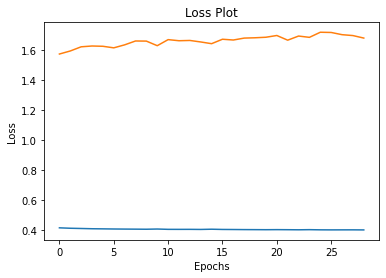

In [72]:
plt.plot(loss_plot)    
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
# plt.savefig('./Observations/MSCOCO/trained-for-11-epochs-batch-size-32-inceptionV3')
plt.show()

In [295]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)
    #process the input image to desired format before extracting features
    temp_input = tf.expand_dims(load_image(image)[0], 0) 
    
    # Extract features using our feature extraction model
    img_tensor_val = base_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))
    
    # extract the features by passing the input to encoder
    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        # get the output from decoder
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
        
        #extract the predicted id(embedded value) which carries the max value
        predicted_id = tf.argmax(predictions[0]).numpy()
        
        #map the id to the word from tokenizer and append the value to the result list
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions

In [296]:
def plot_attmap(image, result, attention_plot):

    temp_image = np.array(Image.open(image))

    fig = plt.figure(figsize=(10, 10))

    len_result = len(result)
    for l in range(len_result):
        temp_att = np.resize(attention_plot[l], (8, 8))
        ax = fig.add_subplot(len_result//2, len_result//2, l+1)
        ax.set_title(result[l])
        img = ax.imshow(temp_image)
        ax.imshow(temp_att, cmap='gray', alpha=0.6, extent=img.get_extent())

    plt.tight_layout() 
    plt.show()

In [297]:
# to filter unwanted tokens 
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [298]:
def beam_evaluate(image, beam_index = 3):
#     max_l = max_length
    start = [tokenizer.word_index['<start>']]
    result = [[start, 0.0]]

    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = base_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)

    while len(result[0][0]) < max_length:
        i=0
        temp = []
        for s in result:
            predictions, hidden, attention_weights = decoder(dec_input, features, hidden)
            attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
            i=i+1
            word_preds = np.argsort(predictions[0])[-beam_index:]

            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)

                prob += np.log(predictions[0][w])

                temp.append([next_cap, prob])
        result = temp
        result = sorted(result, reverse=False, key=lambda l: l[1])
        result = result[-beam_index:]


        predicted_id = result[-1]
        pred_list = predicted_id[0]

        prd_id = pred_list[-1] 
        if(prd_id!=3):
            dec_input = tf.expand_dims([prd_id], 0)
        else:
            break


    result2 = result[-1][0]

    intermediate_caption = [tokenizer.index_word[i] for i in result2]
    final_caption = []
    for i in intermediate_caption:
        final_caption.append(i)
        if i == '<end>':
            break


    attention_plot = attention_plot[:len(final_caption[1:]), :]
    return final_caption,attention_plot

In [77]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [305]:
def predict(k):
    # take a random image
    rid = np.random.randint(0, len(img_train))
    test_image = img_train[rid]
#     test_image = '../input/images/Women-in-blood.jpg'
    # print original image
    print('Original image:')
    plt.imshow(mpimg.imread(test_image),interpolation='nearest',aspect='auto')
    Image.open(test_image)
    plt.title('Selected Image for testing:')
    plt.grid(None)
    print("#"*100) 
    
    # print the real caption 
    real_caption = ' '.join([tokenizer.index_word[i] for i in cap_train[rid] if i not in [0]])
    real_caption=filt_text(real_caption)
    print ('Real Caption:', real_caption)
    print("#"*100)
    
    #print predicted caption
    result1, attention_plot1 = beam_evaluate(test_image,k)
    result2, attention_plot2 , _ = evaluate(test_image)
    
    result1 = result1[1:]
    pred_caption1 = ' '.join(result1).rsplit(' ',1)[0]
    
    pred_caption2 =' '.join(result2).rsplit(' ', 1)[0]
    
    print ('Prediction Caption by Argmax:', pred_caption2)
    print ('Prediction Caption by Beam Search:', pred_caption1)
   
    print("#"*100)
    
    # to print Belu score    
    real_appn = []
    real_appn.append(real_caption.split())
    reference = real_appn
    candidate1 = pred_caption1.split()
    candidate2 = pred_caption2.split()
    
    
    # Belu score for different weights
    print("BLEU SCORE FOR ARGMAX")
    print('BELU score 1-gram: %f' % sentence_bleu(reference, candidate2, weights=(1, 0, 0, 0)))
    print('BELU score 2-gram: %f' % sentence_bleu(reference, candidate2, weights=(.5, .5, 0, 0)))
    print('BELU score 3-gram: %f' % sentence_bleu(reference, candidate2, weights=(.33, .33, .33, 0)))
    print('BELU score 4-gram: %f' % sentence_bleu(reference, candidate2, weights=(.25, .25,.25, .25)))
    print('METEOR score : %f' % (meteor_score(pred_caption2,real_caption)))
    print("#"*100)
    
    print("BLEU SCORE FOR BEAM SEARCH")
    print('BELU score 1-gram: %f' % sentence_bleu(reference, candidate1, weights=(1, 0, 0, 0)))
    print('BELU score 2-gram: %f' % sentence_bleu(reference, candidate1, weights=(.5, .5, 0, 0)))
    print('BELU score 3-gram: %f' % sentence_bleu(reference, candidate1, weights=(.33, .33, .33, 0)))
    print('BELU score 4-gram: %f' % sentence_bleu(reference, candidate1, weights=(.25, .25,.25, .25)))
    print('METEOR score : %f' % (meteor_score(pred_caption1,real_caption)))
    print("#"*100)
    
    
    
    # to plot Captions generated by Attention model along with images 
    print('Captions generated by Attention model:')
    plot_attmap(test_image, result2, attention_plot2)
    print("#"*100)
#     plot_attmap(test_image , result1, attention_plot1)

Original image:
####################################################################################################
Real Caption: the little girl sits on the branch next to the plate of food picking her nose
####################################################################################################
Prediction Caption by Argmax: young child is sitting on the ground eating pizza
Prediction Caption by Beam Search: young girl eating next to her
####################################################################################################
BLEU SCORE FOR ARGMAX
BELU score 1-gram: 0.102095
BELU score 2-gram: 0.076571
BELU score 3-gram: 0.000000
BELU score 4-gram: 0.000000
METEOR score : 0.000000
####################################################################################################
BLEU SCORE FOR BEAM SEARCH
BELU score 1-gram: 0.125917
BELU score 2-gram: 0.068968
BELU score 3-gram: 0.000000
BELU score 4-gram: 0.000000
METEOR score : 0.000000
######################

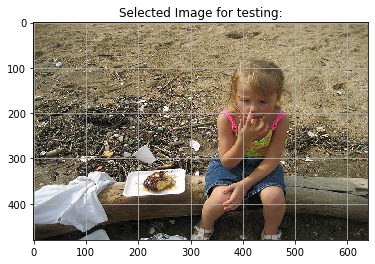

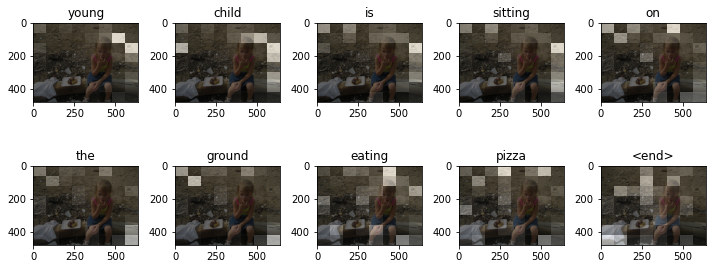

####################################################################################################


In [307]:
# predicting on random test images
predict(5)

In [122]:
len(img_train)

332098

In [311]:
# evaluating average BLUE score and Meteor scores 
def CummulativeScores(k = 3):
    
    score_greedy_b1 = []
    score_greedy_b2 = []
    score_greedy_b3 = []
    score_greedy_b4 = []
    score_beam_b1 = []
    score_beam_b2 = []
    score_beam_b3 = []
    score_beam_b4 = []
    meteor_score_beam = []
    meteor_score_greedy = []
    
    
    for rid in range(0,100):
        test_image = img_test[rid]
        real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]])
        real_caption=filt_text(real_caption)

        #print predicted caption
        result1, attention_plot1 = beam_evaluate(test_image,k)
        result2, attention_plot2 , _ = evaluate(test_image)
    
        result1 = result1[1:]
        pred_caption1 = ' '.join(result1).rsplit(' ',1)[0]
    
        pred_caption2 =' '.join(result2).rsplit(' ', 1)[0]
    
    
    
        # to print Belu score    
        real_appn = []
        real_appn.append(real_caption.split())
        reference = real_appn
        candidate1 = pred_caption1.split()
        candidate2 = pred_caption2.split()
    
        # Belu score for different weights
        # "BLEU SCORE FOR ARGMAX"
        score_greedy_b1.append(sentence_bleu(reference, candidate2, weights=(1, 0, 0, 0)))
        score_greedy_b2.append(sentence_bleu(reference, candidate2, weights=(.5, .5, 0, 0)))
        score_greedy_b3.append(sentence_bleu(reference, candidate2, weights=(.33, .33, .33, 0)))
        score_greedy_b4.append(sentence_bleu(reference, candidate2, weights=(.25, .25,.25, .25)))
    
        #"BLEU SCORE FOR BEAM SEARCH"
        score_beam_b1.append(sentence_bleu(reference, candidate1, weights=(1, 0, 0, 0)))
        score_beam_b2.append(sentence_bleu(reference, candidate1, weights=(.5, .5, 0, 0)))
        score_beam_b3.append(sentence_bleu(reference, candidate1, weights=(.33, .33, .33, 0)))
        score_beam_b4.append(sentence_bleu(reference, candidate1, weights=(.25, .25,.25, .25)))
        
        meteor_score_beam.append(meteor_score(pred_caption1,real_caption))
        meteor_score_greedy.append(meteor_score(pred_caption2,real_caption))
        
        print('Completed {} Examples'.format(rid))
    
    print('For Argmax :')
    print('BELU score 1-gram: %f' % (sum(score_greedy_b1)/len(score_greedy_b1)))
    print('BELU score 2-gram: %f' % (sum(score_greedy_b2)/len(score_greedy_b2)))
    print('BELU score 3-gram: %f' % (sum(score_greedy_b3)/len(score_greedy_b3)))
    print('BELU score 4-gram: %f' % (sum(score_greedy_b4)/len(score_greedy_b4)))
    print('METEOR score : %f' % (sum(meteor_score_greedy)/len(meteor_score_greedy)))
    
    print('For Beam search :')
    print('BELU score 1-gram: %f' % (sum(score_beam_b1)/len(score_beam_b1)))
    print('BELU score 2-gram: %f' % (sum(score_beam_b2)/len(score_beam_b2)))
    print('BELU score 3-gram: %f' % (sum(score_beam_b3)/len(score_beam_b3)))
    print('BELU score 4-gram: %f' % (sum(score_beam_b4)/len(score_beam_b4)))
    print('METEOR score : %f' % (sum(meteor_score_beam)/len(meteor_score_beam)))
    

In [312]:
CummulativeScores(3)

Completed 0 Examples
Completed 1 Examples
Completed 2 Examples
Completed 3 Examples
Completed 4 Examples
Completed 5 Examples
Completed 6 Examples
Completed 7 Examples
Completed 8 Examples
Completed 9 Examples
Completed 10 Examples
Completed 11 Examples
Completed 12 Examples
Completed 13 Examples
Completed 14 Examples
Completed 15 Examples
Completed 16 Examples
Completed 17 Examples
Completed 18 Examples
Completed 19 Examples
Completed 20 Examples
Completed 21 Examples
Completed 22 Examples
Completed 23 Examples
Completed 24 Examples
Completed 25 Examples
Completed 26 Examples
Completed 27 Examples
Completed 28 Examples
Completed 29 Examples
Completed 30 Examples
Completed 31 Examples
Completed 32 Examples
Completed 33 Examples
Completed 34 Examples
Completed 35 Examples
Completed 36 Examples
Completed 37 Examples
Completed 38 Examples
Completed 39 Examples
Completed 40 Examples
Completed 41 Examples
Completed 42 Examples
Completed 43 Examples
Completed 44 Examples
Completed 45 Example

In [308]:
def Predict_On_Your_Image(path,k):
    
    test_image = path

    # print original image
    print("#"*100) 
    print('Original image:',path)
#     plt.imshow(mpimg.imread(test_image),interpolation='nearest',aspect='auto')
#     Image.open(test_image)
#     plt.title('Selected Image for testing:')
#     plt.grid(None)
   
    
    
    #print predicted caption
#     result1, attention_plot1 = beam_evaluate(test_image,k)
    result2, attention_plot2 , _ = evaluate(test_image)
    
#     result1 = result1[1:]
#     pred_caption1 = ' '.join(result1).rsplit(' ',1)[0]
    
    pred_caption2 =' '.join(result2).rsplit(' ', 1)[0]
    
    print ('Prediction Caption by Argmax:', pred_caption2)
#     print ('Prediction Caption by Beam Search:', pred_caption1)
   
    
    # to plot Captions generated by Attention model along with images 
#     print('Captions generated by Attention model:')
#     plot_attmap(test_image, result2, attention_plot2)
#     print("#"*100)
#     plot_attmap(test_image , result1, attention_plot1)
    

In [309]:
category = 'car accidents'
imgs = os.listdir(os.path.join('AD-images',category))
for img in imgs:
    Predict_On_Your_Image(os.path.join('AD-images/car accidents',img),3)

####################################################################################################
Original image: AD-images/car accidents\0iEZnR3kN5hJP9gbvpE8.jpg
Prediction Caption by Argmax: young woman lying unconscious on the road possibly after being hit by the black car
####################################################################################################
Original image: AD-images/car accidents\2gTKJL1ENFBNDOLCaTuM.jpg
Prediction Caption by Argmax: woman coming out of car after white car hits her car from behind
####################################################################################################
Original image: AD-images/car accidents\2zF4ufPfOo8YEulc8qqa.jpg
Prediction Caption by Argmax: black car hits blue car on the road
####################################################################################################
Original image: AD-images/car accidents\3t9KP7rOxuqJfmx1Zm2.jpg
Prediction Caption by Argmax: two cars badly damaged from ashe

Prediction Caption by Argmax: man horrified by sudden accident involving him taking place in front of him
####################################################################################################
Original image: AD-images/car accidents\EjsQJ4eBQJoCE7Fl8zoD.jpg
Prediction Caption by Argmax: one male bicyclist lying injured on the ground after being hit by car in no condition to be used again after crashing into one car and motorbike and lying on the ground after being hit by car in no condition to be used again after crashing into one
####################################################################################################
Original image: AD-images/car accidents\EmaQKbp0h9Wb9HS4ALm.jpg
Prediction Caption by Argmax: two cars badly damaged from the front
####################################################################################################
Original image: AD-images/car accidents\eZbPiAPxGmFSVFF8xla5.jpg
Prediction Caption by Argmax: man and woman arguin

Prediction Caption by Argmax: car hits another black smoke forming over the damaged car from the headlights and crashed in massive car accident
####################################################################################################
Original image: AD-images/car accidents\lPiFaDP6H71DZwKSAx0.jpg
Prediction Caption by Argmax: car ramps into the car
####################################################################################################
Original image: AD-images/car accidents\M07Mdo14Z9B9N9avUGTN.jpg
Prediction Caption by Argmax: car hits black car from the side of the car off the road with flashes of the front part of black smoke forming around to inspect the damage
####################################################################################################
Original image: AD-images/car accidents\M7HgGWoELV3mU40Xpu.jpg
Prediction Caption by Argmax: white car badly damaged from the front after car accident
##################################################

Prediction Caption by Argmax: young woman in blue tank engine emitting white clouds of glass on the road with red car hits black car from behind with the front part of the road
####################################################################################################
Original image: AD-images/car accidents\Rwi6kNLWKOfwWgOnBGb.jpg
Prediction Caption by Argmax: man on road after being hit the car
####################################################################################################
Original image: AD-images/car accidents\s9pmegDEVd5GSYbe3Ml4.jpg
Prediction Caption by Argmax: young female bicyclist holding her knee and dense smoke forming over the car
####################################################################################################
Original image: AD-images/car accidents\SGbKcFJWvb8V4rjXET80.jpg
Prediction Caption by Argmax: one white crashing into black car from behind
#############################################################################

In [56]:
# function for prediction and text to speech conversion

# def pred_speech():
#     # take a random image
#     rid = np.random.randint(0, len(img_test))
#     test_image = img_test[rid]
    
#     # print original image
#     print('Original image:')
#     plt.imshow(mpimg.imread(test_image),interpolation='nearest',aspect='auto')
#     Image.open(test_image)
#     plt.title('Selected Image for testing:')
#     plt.grid(None)
#     print("#"*100) 
    
#     # print the real caption 
#     real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]])
#     real_caption=filt_text(real_caption)
#     print ('Real Caption:', real_caption)
#     print("#"*100)
    
#     #print predicted caption
#     result, attention_plot,pred_test = evaluate(test_image)
#     pred_caption=' '.join(result).rsplit(' ', 1)[0]
#     print ('Prediction Caption:', pred_caption)
#     print("#"*100)
    
#     # to print Belu score    
#     real_appn = []
#     real_appn.append(real_caption.split())
#     reference = real_appn
#     candidate = pred_caption.split()
    
#     # Belu score for different weights
#     print('BELU score 1-gram: %f' % sentence_bleu(reference, candidate, weights=(1, 0, 0, 0)))
#     print('BELU score 2-gram: %f' % sentence_bleu(reference, candidate, weights=(.5, .5, 0, 0)))
#     print('BELU score 3-gram: %f' % sentence_bleu(reference, candidate, weights=(.33, .33, .33, 0)))
#     print('BELU score 4-gram: %f' % sentence_bleu(reference, candidate, weights=(.25, .25,.25, .25)))
#     print("#"*100)
    
#     # to plot Captions generated by Attention model along with images 
#     print('Captions generated by Attention model:')
#     plot_attmap(test_image, result, attention_plot)
#     print("#"*100)

    # to convert text to speech
#     print('Audio for the predicted caption:')                      
#     language = 'en'
#     txt_spch = gTTS(text=pred_caption, lang=language, slow=False)
#     txt_spch.save("text_to_speech.mp3")

Original image:
####################################################################################################
Real Caption: there is group of musicians sitting in wooden chairs each with different instrument
####################################################################################################
Prediction Caption: group of six males sitting in front of table with instruments
####################################################################################################
BELU score 1-gram: 0.378979
BELU score 2-gram: 0.251386
BELU score 3-gram: 0.000000
BELU score 4-gram: 0.000000
####################################################################################################
Captions generated by Attention model:


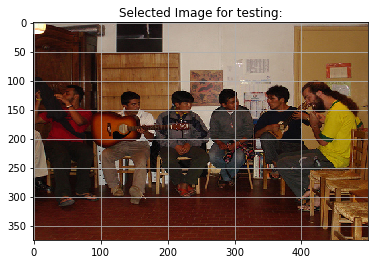

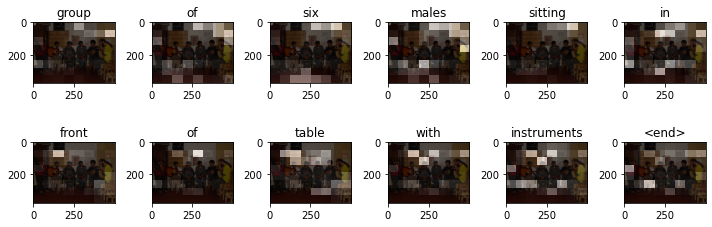

####################################################################################################


In [71]:
pred_speech()